In [1]:
%%capture
# move to src folder so we can import code
%cd ../src

In [2]:
from common.kaggle import download_dataset
import config

In [4]:
download_dataset(config.OWNER, config.DATASET, config.DATA_INPUT)

['adult.csv']


# Let's take a look at the data

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(config.DATA)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

The dataset consists of 15 features:
* Five numerical variables
* Eight nominal variables
* One ordinal variables
* A target variable

In [8]:
pd.unique(df.income)

array(['<=50K', '>50K'], dtype=object)

It's a binary classification problem

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# magic function to draw inside the notebook
%matplotlib inline

Text(0, 0.5, 'count')

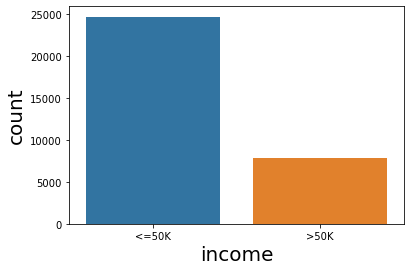

In [12]:
b = sns.countplot(x="income", data=df)
b.set_xlabel("income", fontsize=20)
b.set_ylabel("count", fontsize=20)

The target is heavily **skewed**, so we should use **AUC** as metric